In [146]:
using Plots, PlotThemes, LaTeXStrings
using OffsetArrays
using Unitful
using FFTW
using Base: Fix1, Fix2

pyplot()
j=im
theme(:dracula)
default(textcolor=:white)


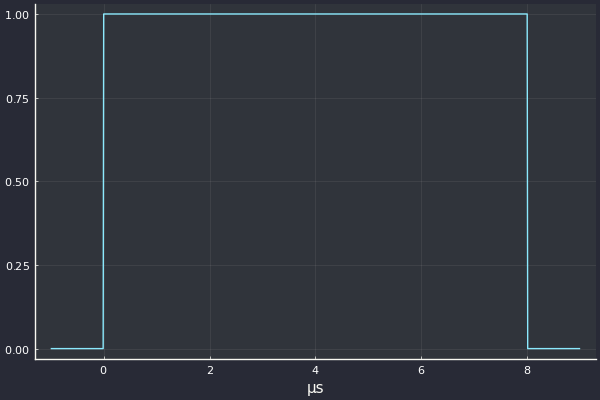

In [147]:
T_TR = 1.000u"ns"
Δ_F = 20u"MHz"/64
T_SHORT = 8u"μs"
T_LONG = 8u"μs"
T_GI2 = 1.6u"μs"

function w(T, t)
    if t < -T_TR/2 
        return 0
    elseif t < T_TR/2
        return sin(π/2*(0.5+t/T_TR))^2
    elseif t < T-T_TR/2
        return 1
    elseif t < T+T_TR/2
        return sin(π/2*(0.5-(t-T)/T_TR))^2
    else
        return 0
    end
end

t = range(-1u"μs", 9u"μs", length=1000)


plot(t, Fix1(w, T_SHORT), legend=false)

In [148]:
S = OffsetArray(sqrt(13/6).*[0, 0, 1+j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, -1-j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, 0,
0, 0, 0, -1-j, 0, 0, 0, -1-j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0, 0, 0, 1+j, 0,0], -26:26)

L = OffsetArray([1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 0,
1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0].|> Real .|> Complex, -26:26) 


r_l(t) = w(T_LONG,t)*sum(L[k]*exp(j*k*2π*Δ_F*(t-T_GI2)) for k in eachindex(L))

r_s(t) = w(T_SHORT,t)*sum(S[k]*exp(j*k*2π*Δ_F*t) for k in eachindex(S))

r_s (generic function with 1 method)

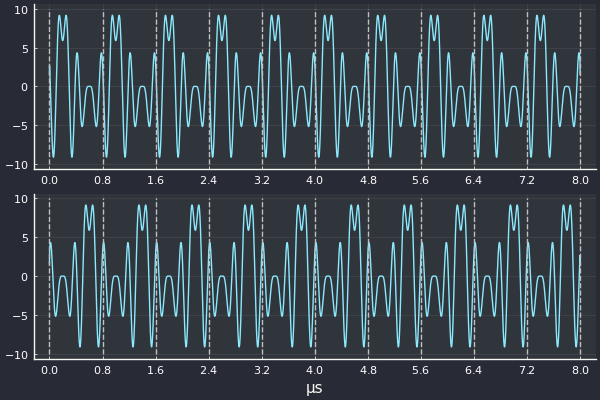

In [149]:
t = range(0u"μs", 8u"μs", length=5000)

rs = r_s.(t)

p1 = plot(t, real(rs), xlabel="")
p2 = plot(t, imag(rs))
for i in 0:0.8:8
    plot!(p1, [i,i], [-10,10], linestyle=:dash, linecolor=:silver)
    plot!(p2, [i,i], [-10,10], linestyle=:dash, linecolor=:silver)
end

plot(p1, p2, layout=(2,1), legend=false, xticks=0:0.8:8)

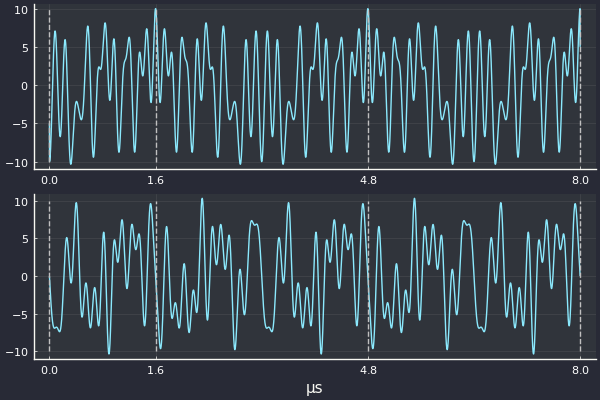

In [150]:
rl = r_l.(t)

p1 = plot(t, real(rl), xlabel="")
p2 = plot(t, imag(rl))

for i in [0,1.6,4.8,8]
    plot!(p1, [i,i], [-10,10], linestyle=:dash, linecolor=:silver)
    plot!(p2, [i,i], [-10,10], linestyle=:dash, linecolor=:silver)
end

plot(p1, p2, layout=(2,1), legend = false, xticks=[0,1.6,4.8,8])

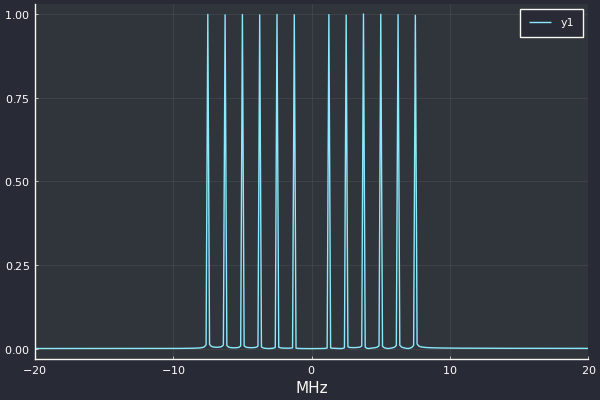

In [151]:
f = fftfreq(length(t), 1/(t[2]-t[1]) |> u"MHz")
plot(f |> fftshift, abs.(fft(rs))./maximum(abs.(fft(rs)))|>fftshift, xlim=(-20u"MHz", 20u"MHz"))

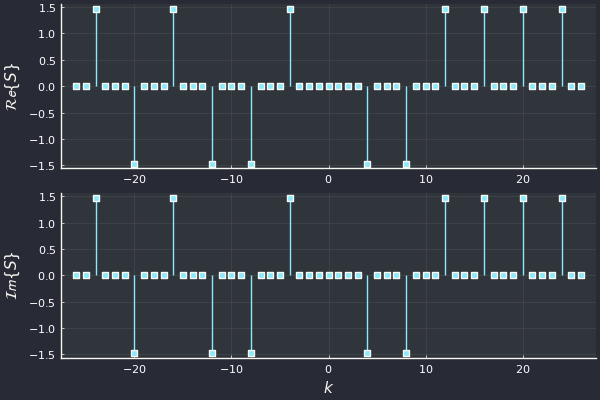

In [152]:
p1 = plot(real(S), line=:stem, marker=:square, ylabel=L"\mathcal{Re}\{S\}")
p2 = plot(imag(S), line=:stem, marker=:square, ylabel=L"\mathcal{Im}\{S\}", xlabel=L"k")

plot(p1,p2, layout=(2,1), legend=false)

In [153]:
shift(S) |> println

ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, -1.4719601443879744 - 1.4719601443879744im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, -1.4719601443879744 - 1.4719601443879744im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 1.4719601443879744 + 1.4719601443879744im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 1.4719601443879744 + 1.4719601443879744im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 1.4719601443879744 + 1.4719601443879744im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 1.4719601443879744 + 1.4719601443879744im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 1.4719601443879744 + 1.4719601443879744im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, -1.4719601443879744 - 1.4719601443879744im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 1.4719601443879744 + 1.4719601443879744im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, -1.4719601443879744 - 1.4719601443879744

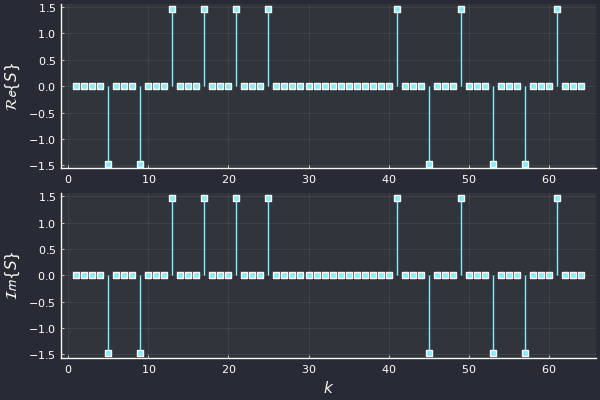

In [154]:
shift(x) = [i in 1:26 ? x[i] : (i in 38:63 ? x[i-64] : 0.0+im*0.0) for i in 0:63]

S_shift = shift(S)

p1 = plot(S_shift |> real, line=:stem, marker=:square, ylabel=L"\mathcal{Re}\{S\}")
p2 = plot(S_shift |> imag, line=:stem, marker=:square, ylabel=L"\mathcal{Im}\{S\}", xlabel=L"k")

plot(p1,p2, layout=(2,1), legend=false)

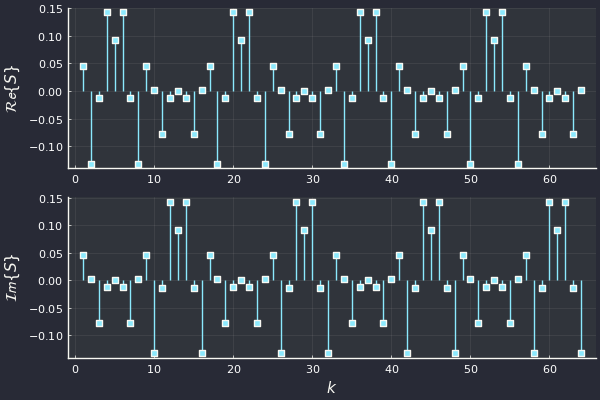

In [155]:
using FFTW 
S_time = ifft(S_shift)

p1 = plot(S_time |> real, line=:stem, marker=:square, ylabel=L"\mathcal{Re}\{S\}")
p2 = plot(S_time |> imag, line=:stem, marker=:square, ylabel=L"\mathcal{Im}\{S\}", xlabel=L"k")

plot(p1,p2, layout=(2,1), legend=false)

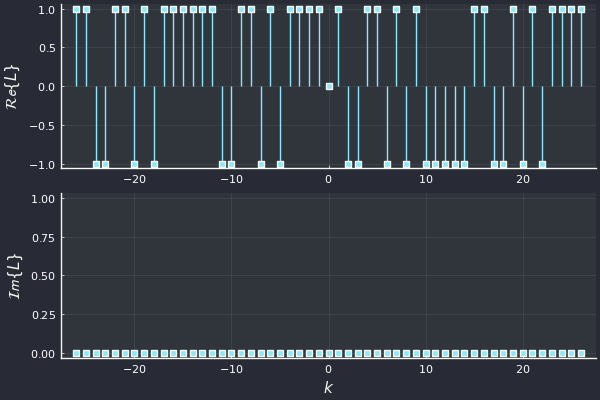

In [156]:
p1 = plot(real(L), line=:stem, marker=:square, ylabel=L"\mathcal{Re}\{L\}")
p2 = plot(imag(L), line=:stem, marker=:square, ylabel=L"\mathcal{Im}\{L\}", xlabel=L"k")

plot(p1,p2, layout=(2,1), legend=false)

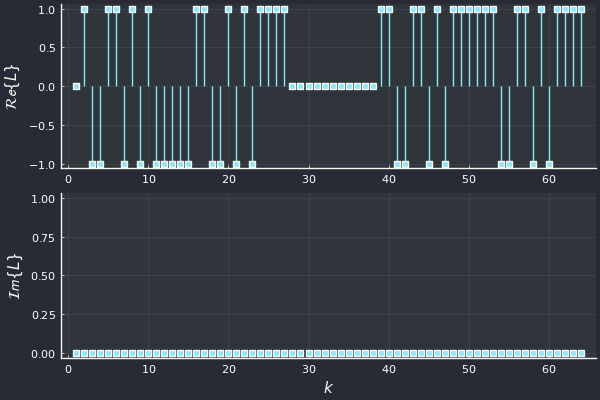

In [157]:
L_shift = shift(L)

p1 = plot(L_shift |> real, line=:stem, marker=:square, ylabel=L"\mathcal{Re}\{L\}")
p2 = plot(L_shift |> imag, line=:stem, marker=:square, ylabel=L"\mathcal{Im}\{L\}", xlabel=L"k")

plot(p1,p2, layout=(2,1), legend=false)

In [158]:
L_shift

64-element Vector{ComplexF64}:
  0.0 + 0.0im
  1.0 + 0.0im
 -1.0 + 0.0im
 -1.0 + 0.0im
  1.0 + 0.0im
  1.0 + 0.0im
 -1.0 + 0.0im
  1.0 + 0.0im
 -1.0 + 0.0im
  1.0 + 0.0im
      ⋮
  1.0 + 0.0im
  1.0 + 0.0im
 -1.0 + 0.0im
  1.0 + 0.0im
 -1.0 + 0.0im
  1.0 + 0.0im
  1.0 + 0.0im
  1.0 + 0.0im
  1.0 + 0.0im

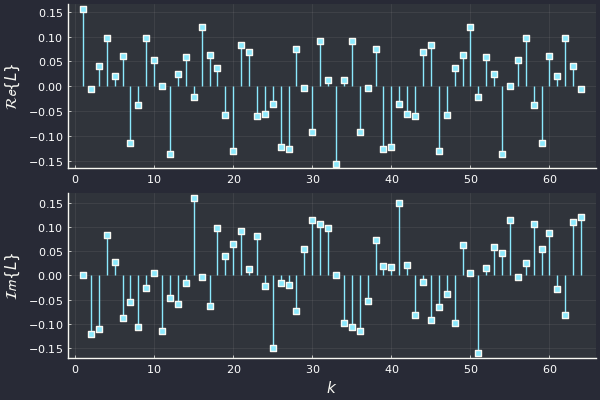

In [159]:
L_time = ifft(L_shift)

p1 = plot(L_time |> real, line=:stem, marker=:square, ylabel=L"\mathcal{Re}\{L\}")
p2 = plot(L_time |> imag, line=:stem, marker=:square, ylabel=L"\mathcal{Im}\{L\}", xlabel=L"k")

plot(p1,p2, layout=(2,1), legend=false)

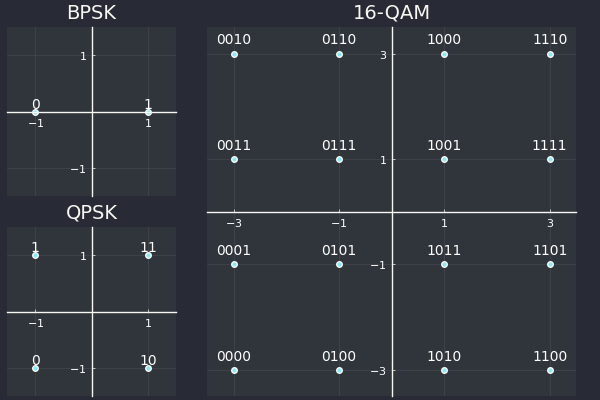

In [160]:
I = [-1, 1]
Q = [ 0, 0]
c = [ 0, 1]
p1 = scatter(I, Q, framestyle=:origin, aspect_ratio=:equal, xlim=(-1.5, 1.5), ylim=(-1.5,1.5),title="BPSK", xticks=[-1,1], yticks=[-1,1])
annotate!(I, Q.+0.125, Plots.text.(c, :white, 10), legend=false)
I = [-1,-1, 1, 1]
Q = [-1, 1,-1, 1]
c = [00,01,10,11]
p2 = scatter(I, Q, framestyle=:origin, aspect_ratio=:equal, xlim=(-1.5, 1.5), ylim=(-1.5,1.5),title="QPSK", xticks=[-1,1], yticks=[-1,1])
annotate!(I, Q.+0.125, Plots.text.(c, :white, 10), legend=false)
I = vcat([repeat([i],4) for i in [-3,-1,3,1]]...)
Q = repeat([-3,-1,1,3],4)
c = ["0000","0001","0011","0010","0100","0101","0111","0110","1100","1101","1111","1110","1010","1011","1001","1000"]
lim = 3.5
p3 = scatter(I, Q, framestyle=:origin, aspect_ratio=:equal, xlim=(-lim,lim), ylim=(-lim,lim), title="16-QAM", ticks=[-3,-1,1,3], yticks=[-3,-1,1,3])
annotate!(I, Q.+0.25, Plots.text.(c, :white, 10),legend=:false)
px = plot(p1,p2, layout=(2,1))
plot(px,p3, layout=grid(1,2, widths=[0.3, 0.7]))

In [161]:
ktoi(N, k) = N/16*(k%16)+floor(k/16) |> Int
itoj(N, s, i) = s*floor(i/s)+(i+N-floor((16*i)/N))%s |> Int
jtoi(N, s, j) = s*floor(j/s)+(j+floor((16*j)/N))%s |> Int
itok(N, i) = 16*i-(N-1)*floor((16*i)/N) |> Int

itok (generic function with 1 method)

In [162]:
N = 192
s = 2
ks = 0:N-1
println(ks |> collect)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191]


In [163]:
is = ktoi.(N, ks) 
println(is)
js = itoj.(N,s,is)
println(is)

[0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180, 1, 13, 25, 37, 49, 61, 73, 85, 97, 109, 121, 133, 145, 157, 169, 181, 2, 14, 26, 38, 50, 62, 74, 86, 98, 110, 122, 134, 146, 158, 170, 182, 3, 15, 27, 39, 51, 63, 75, 87, 99, 111, 123, 135, 147, 159, 171, 183, 4, 16, 28, 40, 52, 64, 76, 88, 100, 112, 124, 136, 148, 160, 172, 184, 5, 17, 29, 41, 53, 65, 77, 89, 101, 113, 125, 137, 149, 161, 173, 185, 6, 18, 30, 42, 54, 66, 78, 90, 102, 114, 126, 138, 150, 162, 174, 186, 7, 19, 31, 43, 55, 67, 79, 91, 103, 115, 127, 139, 151, 163, 175, 187, 8, 20, 32, 44, 56, 68, 80, 92, 104, 116, 128, 140, 152, 164, 176, 188, 9, 21, 33, 45, 57, 69, 81, 93, 105, 117, 129, 141, 153, 165, 177, 189, 10, 22, 34, 46, 58, 70, 82, 94, 106, 118, 130, 142, 154, 166, 178, 190, 11, 23, 35, 47, 59, 71, 83, 95, 107, 119, 131, 143, 155, 167, 179, 191]


[0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180, 1, 13, 25, 37, 49, 61, 73, 85, 97, 109, 121, 133, 145, 157, 169, 181, 2, 14, 26, 38, 50, 62, 74, 86, 98, 110, 122, 134, 146, 158, 170, 182, 3, 15, 27, 39, 51, 63, 75, 87, 99, 111, 123, 135, 147, 159, 171, 183, 4, 16, 28, 40, 52, 64, 76, 88, 100, 112, 124, 136, 148, 160, 172, 184, 5, 17, 29, 41, 53, 65, 77, 89, 101, 113, 125, 137, 149, 161, 173, 185, 6, 18, 30, 42, 54, 66, 78, 90, 102, 114, 126, 138, 150, 162, 174, 186, 7, 19, 31, 43, 55, 67, 79, 91, 103, 115, 127, 139, 151, 163, 175, 187, 8, 20, 32, 44, 56, 68, 80, 92, 104, 116, 128, 140, 152, 164, 176, 188, 9, 21, 33, 45, 57, 69, 81, 93, 105, 117, 129, 141, 153, 165, 177, 189, 10, 22, 34, 46, 58, 70, 82, 94, 106, 118, 130, 142, 154, 166, 178, 190, 11, 23, 35, 47, 59, 71, 83, 95, 107, 119, 131, 143, 155, 167, 179, 191]


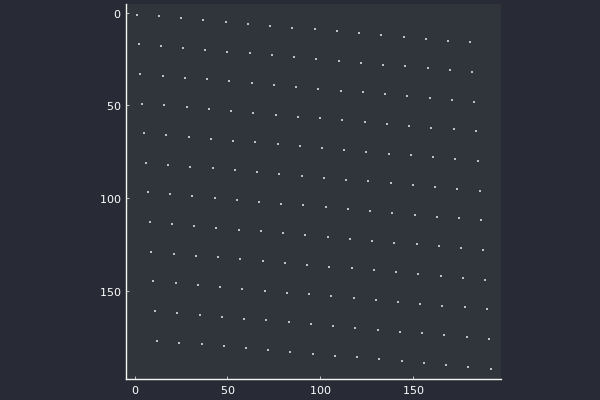

In [164]:
using SparseArrays
params=(markercolor=:silver, markersize=2, markershape=:square)
spy(sparse(ks.+1 ,is.+1, repeat([1], N)); params...)

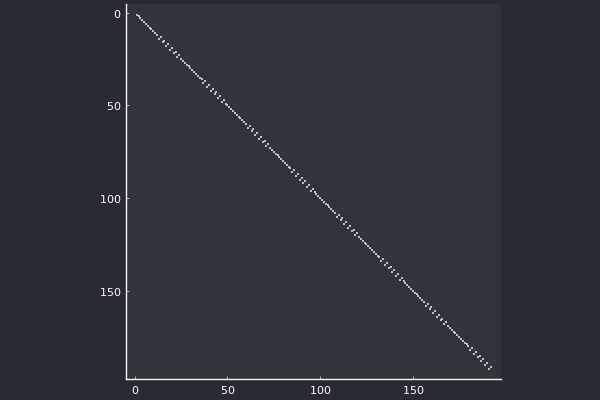

In [165]:
spy(sparse(is.+1 ,js.+1, repeat([1], N)); params...)

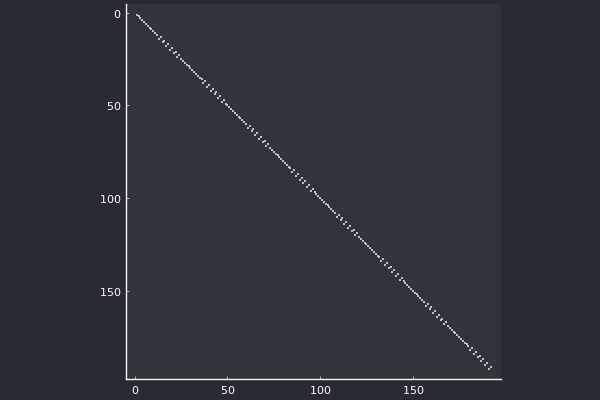

In [166]:
spy(sparse(js.+1,is.+1, repeat([1], N)); params...)

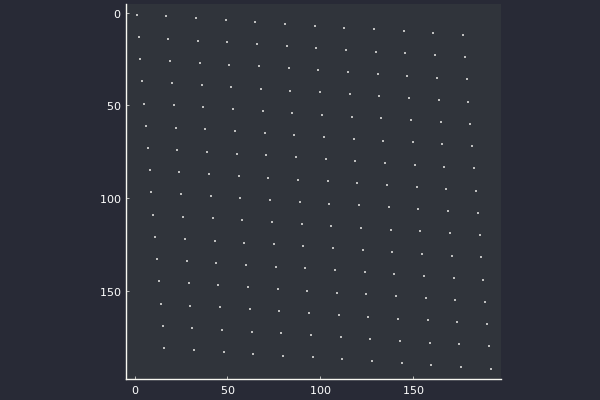

In [167]:
spy(sparse(is.+1 ,ks.+1, repeat([1], N)); params...)

In [168]:
#using TikzPictures
#
#step = 100
#s1 = join("\\draw ($k,$(0*step)) -- ($i,$(1*step));\n" for (k, i) in zip(ks, is))
#s2 = join("\\draw ($i,$(1*step)) -- ($j,$(2*step));\n" for (i,j) in zip(is, js))
#s3 = join("\\draw ($i,$(2*step)) -- ($j,$(3*step));\n" for (i,j) in zip(is, js))
#s4 = join("\\draw ($k,$(3*step)) -- ($i,$(4*step));\n" for (k, i) in zip(ks, is))
#
#tp = TikzPicture(s1*s2*s3*s4)
#save(PDF("test"), tp)
